In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
data =  sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
data.shape

(891, 15)

In [8]:
nulls = data.isnull().sum()
nulls

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
data['age'] = data['age'].fillna(data['age'].median())
data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
data = data.drop(columns=['deck'])
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [11]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [12]:
data['embark_town'].dtype
embark_mode = data['embark_town'].mode()[0]
data['embark_town'] = data['embark_town'].fillna(embark_mode)

In [13]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [14]:
data['embarked'].dtype
embark_mode = data['embarked'].mode()[0]
data['embarked'] = data['embarked'].fillna(embark_mode)

In [15]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

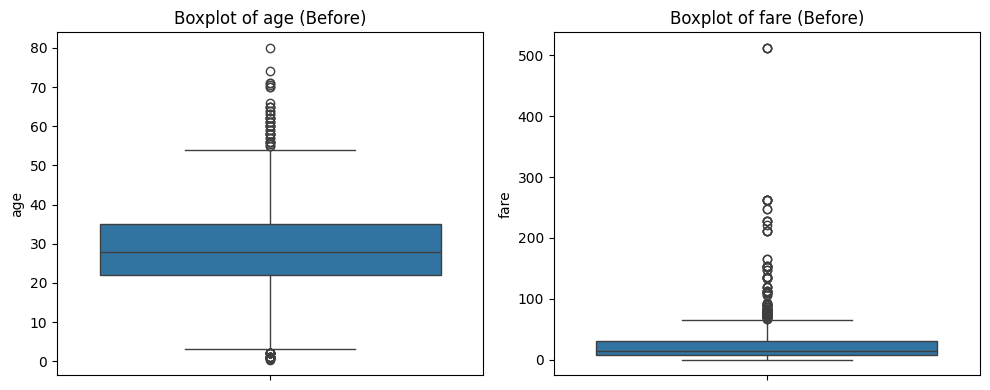

In [33]:
num_cols = ['age', 'fare']
plt.figure(figsize=(10,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col} (Before)')
plt.tight_layout()
plt.show()


In [34]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
data_norm = data.copy()
data_norm[num_cols] = minmax_scaler.fit_transform(data[num_cols])


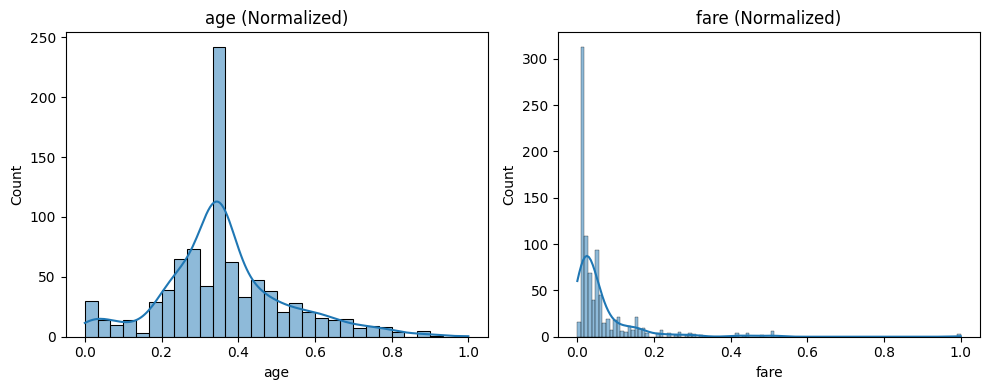

In [35]:
plt.figure(figsize=(10,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.histplot(data_norm[col], kde=True)
    plt.title(f'{col} (Normalized)')
plt.tight_layout()
plt.show()


In [36]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_std = data.copy()
data_std[num_cols] = std_scaler.fit_transform(data[num_cols])


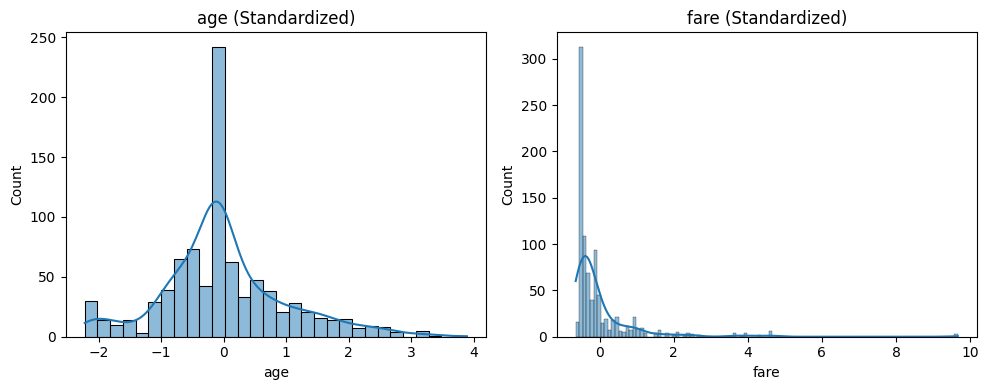

In [37]:
plt.figure(figsize=(10,4))
for i, col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.histplot(data_std[col], kde=True)
    plt.title(f'{col} (Standardized)')
plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
le2 = LabelEncoder()
data['embarked'] = le2.fit_transform(data['embarked'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    int64   
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    int64   
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(3)
memory usage: 79.4+ KB


In [18]:
data_cleaned = data[['pclass', 'sex', 'age', 'fare', 'embarked']]
data_cleaned

,pclass,sex,age,fare,embarked
0,3,1,22.0,7.2500,2
1,1,0,38.0,71.2833,0
2,3,0,26.0,7.9250,2
3,1,0,35.0,53.1000,2
4,3,1,35.0,8.0500,2
...,...,...,...,...,...
886,2,1,27.0,13.0000,2
887,1,0,19.0,30.0000,2
888,3,0,28.0,23.4500,2
889,1,1,26.0,30.0000,0


In [19]:
output_variable = data[['survived']]
output_variable

,survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_cleaned, output_variable, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(max_iter=1000)
lreg.fit(x_train, y_train)

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [22]:
y_pred = lreg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred)

array([[88, 17],
       [19, 55]])

In [24]:
accuracy_score(y_test,y_pred)

0.7988826815642458

In [25]:
new_passenger = pd.DataFrame({
    'pclass':[3],
    'sex': ['male'],
    'age': [28],
    'fare':[7.25],
    'embarked': ['S']

})
new_passenger

,pclass,sex,age,fare,embarked
0,3,male,28,7.25,S


In [26]:
new_passenger['sex'] = le.transform(new_passenger['sex'])
new_passenger['embarked'] = le2.transform(new_passenger['embarked'])

In [27]:
new_passenger

,pclass,sex,age,fare,embarked
0,3,1,28,7.25,2


In [28]:
lreg.predict(new_passenger)

array([0])

In [29]:
new_passengers = pd.DataFrame({
    'pclass':[1,3,2],
    'sex': ['female', 'male', 'female'],
    'age': [38, 45, 14],
    'fare':[80.0, 8.05, 20.0],
    'embarked': ['C', 'S', 'Q']

})
new_passengers

,pclass,sex,age,fare,embarked
0,1,female,38,80.00,C
1,3,male,45,8.05,S
2,2,female,14,20.00,Q


In [30]:
new_passengers['sex'] = le.transform(new_passengers['sex'])
new_passengers['embarked'] = le2.transform(new_passengers['embarked'])

In [31]:
predictions = lreg.predict(new_passengers)
predictions

array([1, 0, 1])

In [32]:
for i, pred in enumerate(predictions):
    print(f"Passenger {i+1} ", end="")
    if pred == 1:
        print("Survived")
    else:
        print("Did not survive")


Passenger 1 Survived
Passenger 2 Did not survive
Passenger 3 Survived
